In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/PUB_Demand_2024_v395.csv", skiprows=3)

In [ ]:
df.head()

,Date,Hour,Market Demand,Ontario Demand
0,2024-01-01,1,17091,14482
1,2024-01-01,2,16658,14180
2,2024-01-01,3,16233,13722
3,2024-01-01,4,15909,13637
4,2024-01-01,5,15998,13697


In [ ]:
df.isna().sum()

,0
Date,0
Hour,0
Market Demand,0
Ontario Demand,0


In [ ]:
df["Hour"]=df["Hour"].apply(lambda x: "0"+str(x-1) if x<11 else str(x-1))
df["Time"]=df["Date"]+"-"+df["Hour"]
df["Time"]=df["Time"].apply(lambda x: x.strip())
df["Time"]=pd.to_datetime(df["Time"], format = "%Y-%m-%d-%H")
df=df.set_index("Time")
df=df.drop(["Date", "Hour"], axis=1)
df.head()

,Market Demand,Ontario Demand
Time,,
2024-01-01 00:00:00,17091,14482
2024-01-01 01:00:00,16658,14180
2024-01-01 02:00:00,16233,13722
2024-01-01 03:00:00,15909,13637
2024-01-01 04:00:00,15998,13697


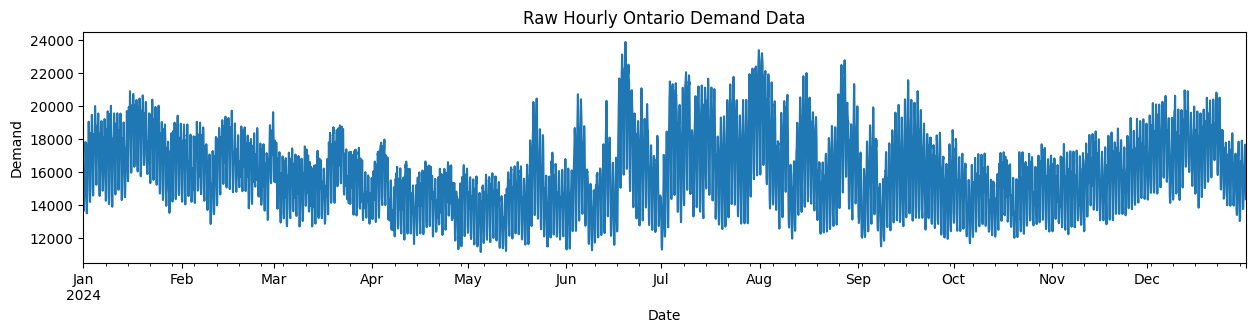

In [ ]:
#raw data plot
fig=plt.figure(figsize=(15,3))
df["Ontario Demand"].plot()
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Raw Hourly Ontario Demand Data")
plt.show()

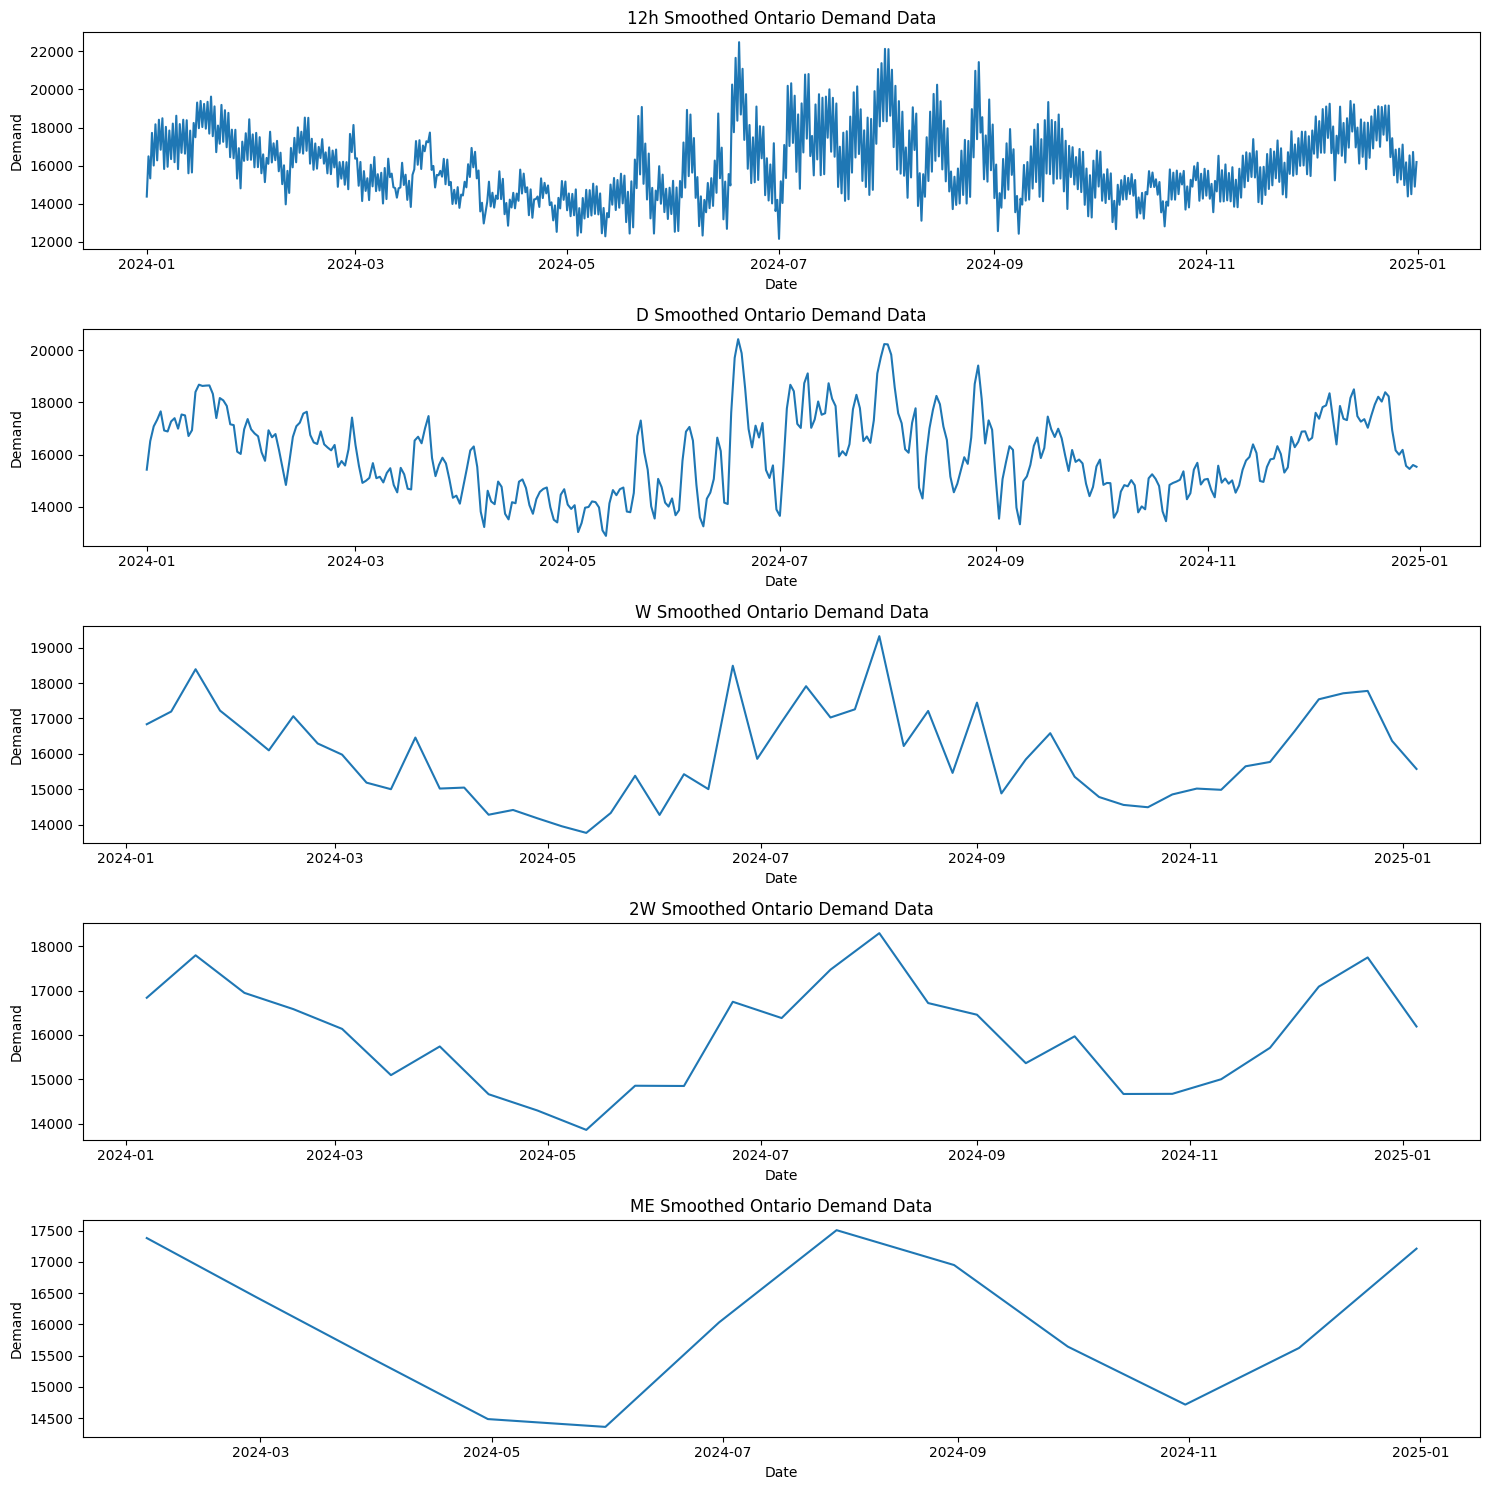

In [ ]:
smoothing_period = ["12h","D","W","2W","ME"]
fig,ax=plt.subplots(5,1,figsize=(15,15))
i=0
for period in smoothing_period:
  smooth_df=df.resample(period).mean()
  ax[i].plot(smooth_df.index,smooth_df["Ontario Demand"])
  ax[i].set_title(period + " Smoothed Ontario Demand Data")
  ax[i].set_xlabel("Date")
  ax[i].set_ylabel("Demand")
  i+=1
plt.tight_layout()
plt.show()

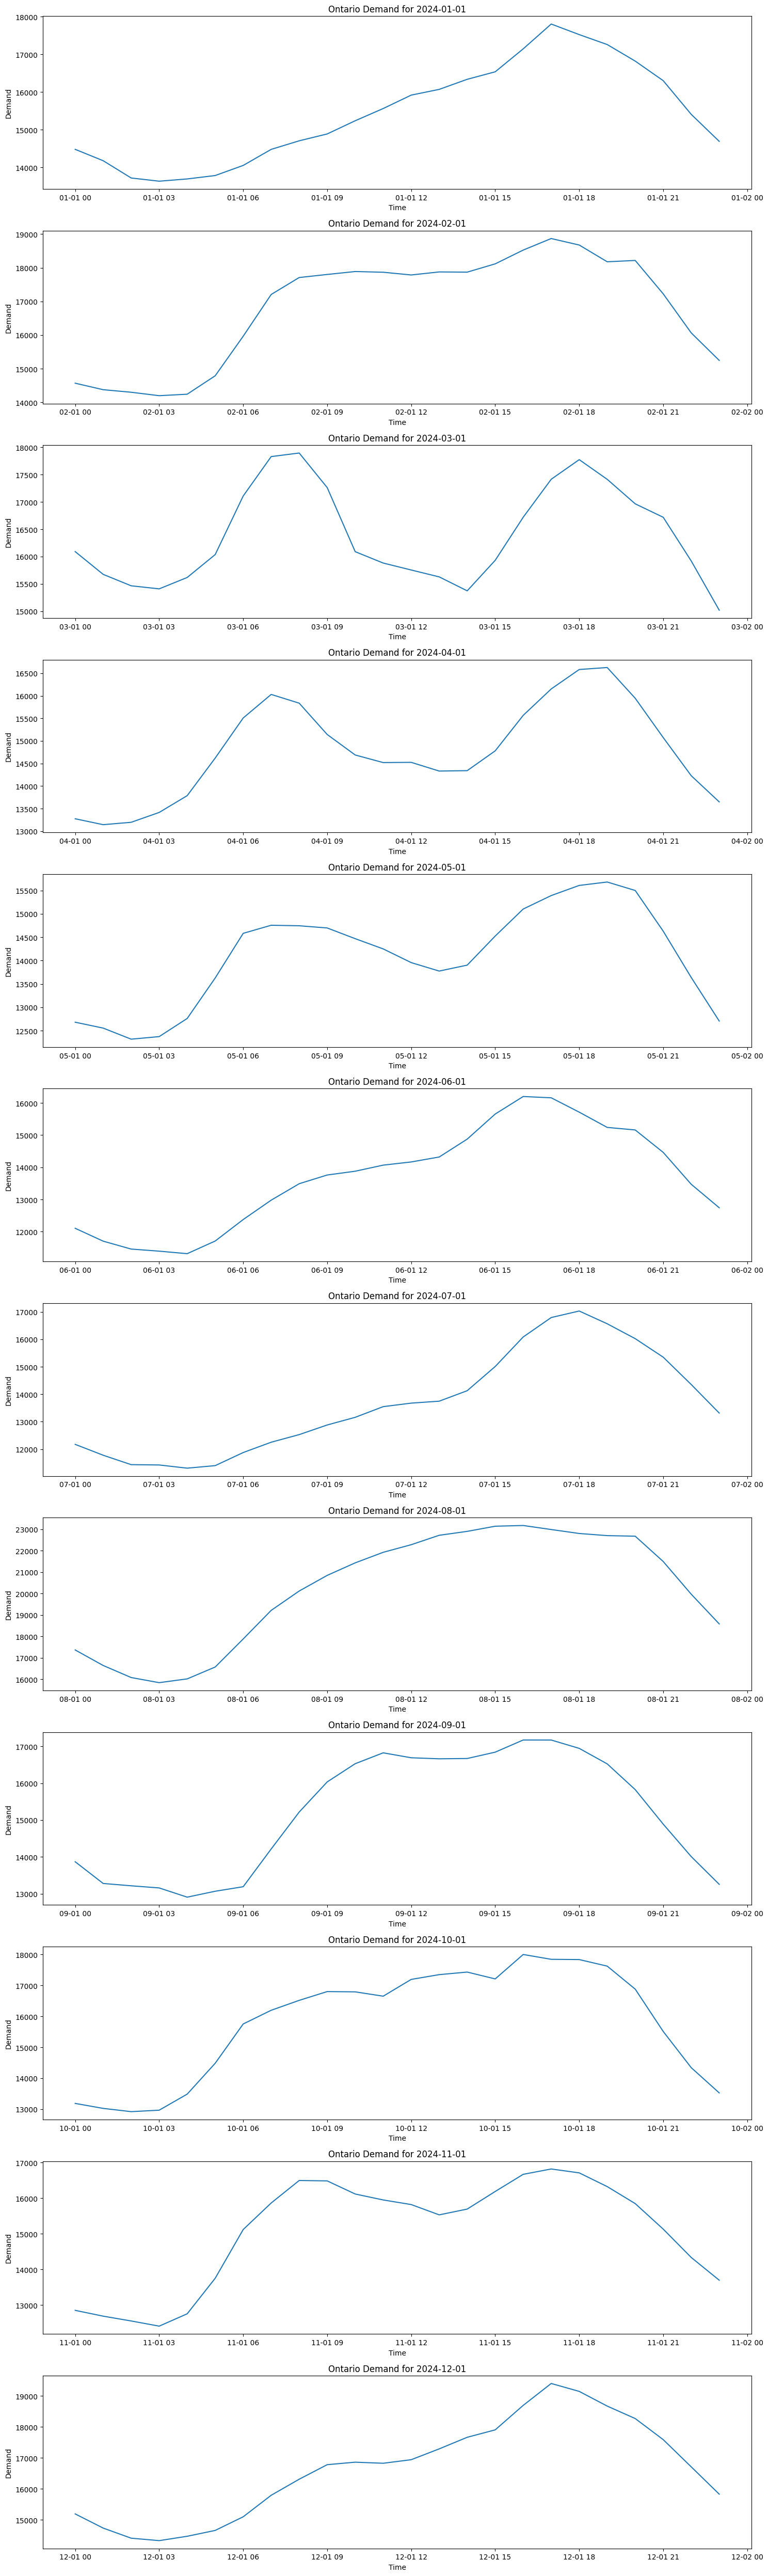

In [ ]:
days = ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01",
        "2024-06-01","2024-07-01", "2024-08-01", "2024-09-01", "2024-10-01",
        "2024-11-01", "2024-12-01"]

fig,ax=plt.subplots(12,1, figsize=(15,50))
i=0
for day in days:
  day_ts=pd.to_datetime(day,format="%Y-%m-%d")
  day_df = df[df.index.date==day_ts.date()]
  ax[i].plot(day_df.index,day_df["Ontario Demand"])
  ax[i].set_title("Ontario Demand for "+day)
  ax[i].set_xlabel("Time")
  ax[i].set_ylabel("Demand")
  i+=1
plt.tight_layout()
plt.show()

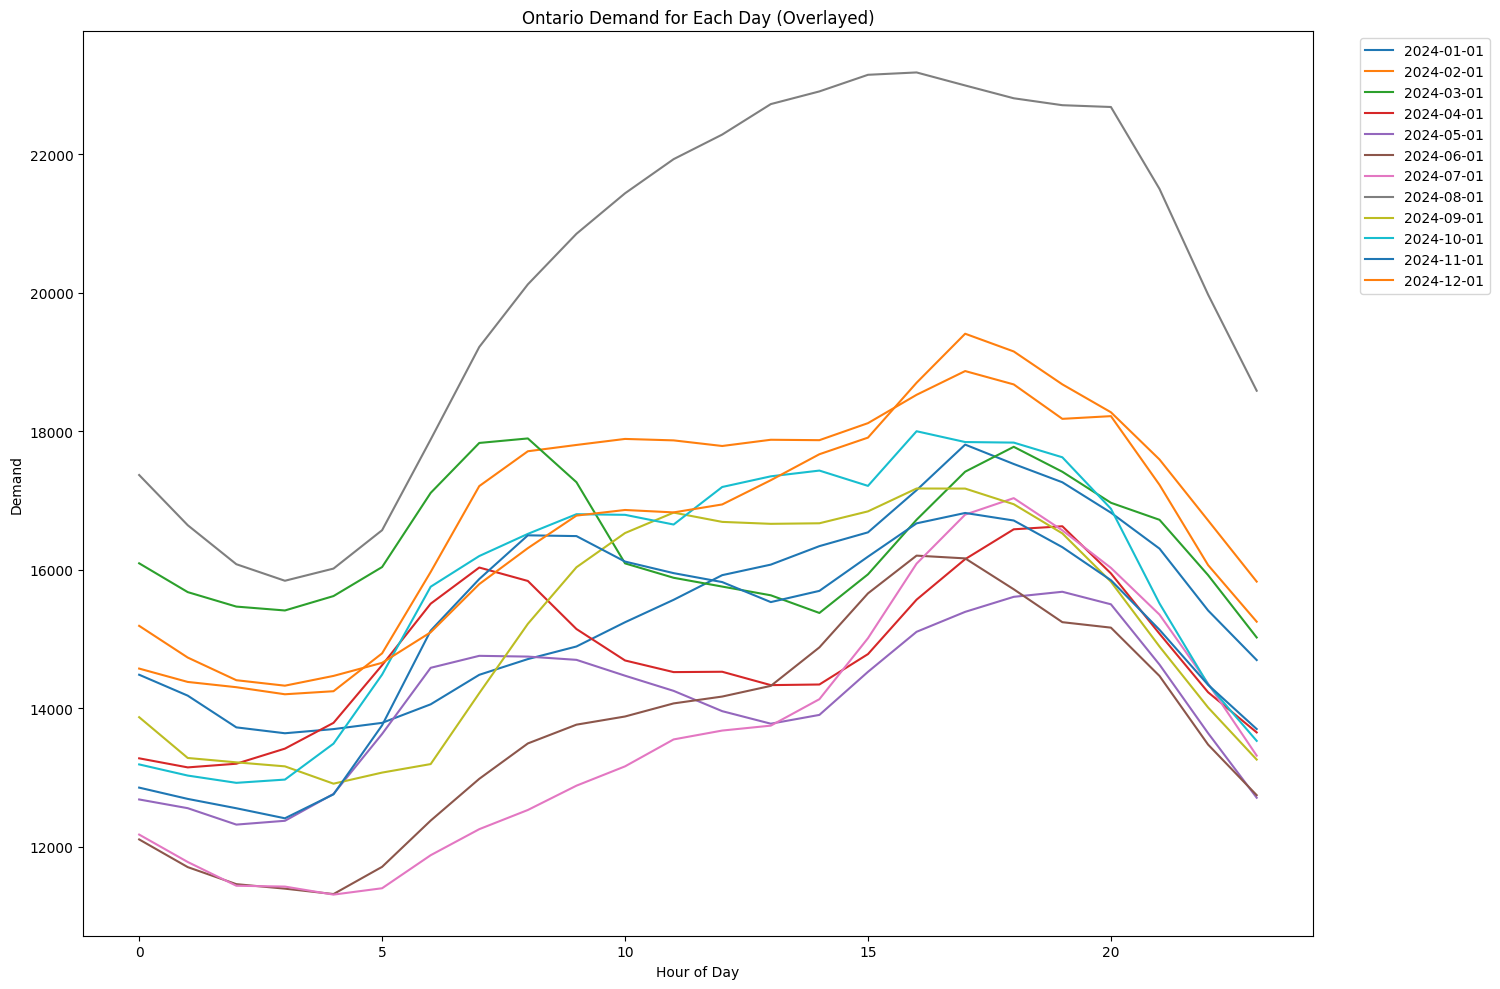

In [ ]:
days = ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01",
        "2024-06-01","2024-07-01", "2024-08-01", "2024-09-01", "2024-10-01",
        "2024-11-01", "2024-12-01"]

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for day in days:
    day_ts = pd.to_datetime(day, format="%Y-%m-%d")
    day_df = df[df.index.date == day_ts.date()]
    plt.plot(day_df.index.hour, day_df["Ontario Demand"], label=day)  # Plot hour on x-axis

plt.xlabel("Hour of Day")
plt.ylabel("Demand")
plt.title("Ontario Demand for Each Day (Overlayed)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # Place legend outside the plot
plt.tight_layout()
plt.show()